https://journals.ametsoc.org/view/journals/atot/27/3/2009jtecho725_1.xml

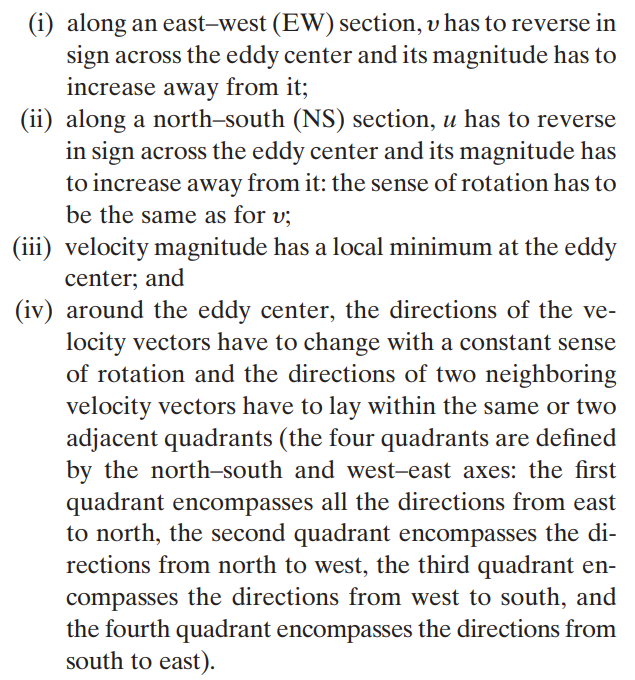

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib notebook

In [17]:
from scipy.io import netcdf_file

# https://resources.marine.copernicus.eu/product-download/SEALEVEL_EUR_PHY_L4_MY_008_068
f = netcdf_file("data2.nc")
lat = f.variables['latitude'].data
long = f.variables['longitude'].data
vel_u = f.variables['ugos'].data.squeeze()
vel_v = f.variables['vgos'].data.squeeze()


# fill in missing values
from common_functions import interpolate_missing_point

imputed_vel_u = interpolate_missing_point(vel_u, np.ma.masked_invalid(vel_u).mask)
imputed_vel_v = interpolate_missing_point(vel_v, np.ma.masked_invalid(vel_v).mask)

/home/jakeb/development/mdm-phase-a-data/venv/lib/python3.9/site-packages/scipy/io/_netcdf.py:304: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  warnings.warn((


## Method Parameters:

In [3]:
a = 4
b = 3

## Constraint 1

<IPython.core.display.Javascript object>


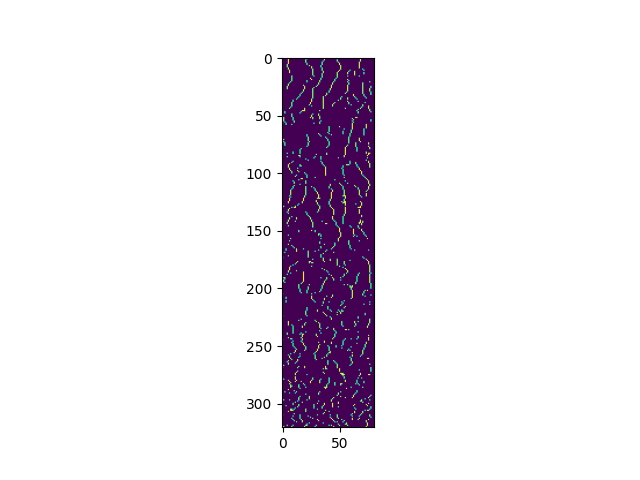

In [35]:
import math
sign = lambda x: math.copysign(1, x)

satifies_crit_1 = []
direction = []

change_of_sign_v = (np.diff(np.sign(imputed_vel_v), axis=1) != 0)*1

for i,j in np.argwhere(change_of_sign_v == 1):
    center = imputed_vel_v[i,j]
    try:
        left = imputed_vel_v[i,j-a]
        right = imputed_vel_v[i,j+a]
    except IndexError:
        continue # point too close to the edge
    if abs(center) < abs(right) and abs(center) < abs(left) and sign(left)*sign(right) == -1:
        satifies_crit_1.append((i,j))
        direction.append(sign(left))

plt.figure()
tmp = np.zeros_like(change_of_sign_v)
tmp[tuple(np.transpose(satifies_crit_1))] = 1
plt.imshow(tmp)

## Constrain 2

<IPython.core.display.Javascript object>


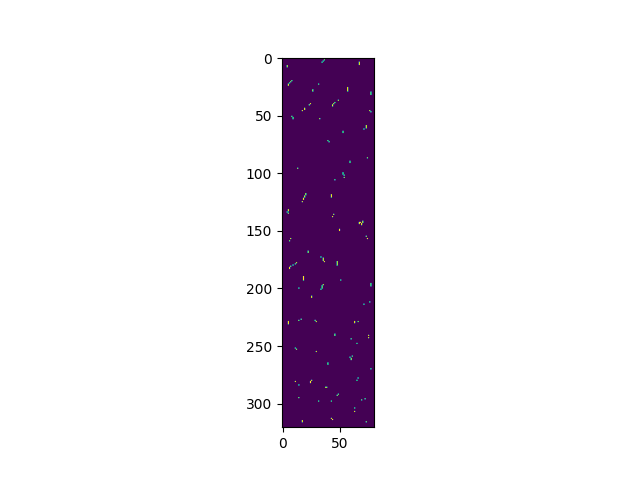

169


In [31]:
satifies_crit_2 = []

for (i, j), clockwise in zip(satifies_crit_1, direction):
    center = imputed_vel_u[i,j]
    try:
        bottom = imputed_vel_u[i-a, j]
        top = imputed_vel_u[i+a,j]
    except IndexError:
        continue # point to close to the edge
    if abs(center) < abs(bottom) and abs(center) < abs(top) and sign(bottom)*sign(top) == -1 and clockwise == sign(top):
        satifies_crit_2.append((i,j))

plt.figure()
tmp = np.zeros_like(change_of_sign_v)
tmp[tuple(np.transpose(satifies_crit_2))] = 1
plt.imshow(tmp)
print(len(satifies_crit_2))

## Constaint 3 

## Constrain 4